In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Quick look
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


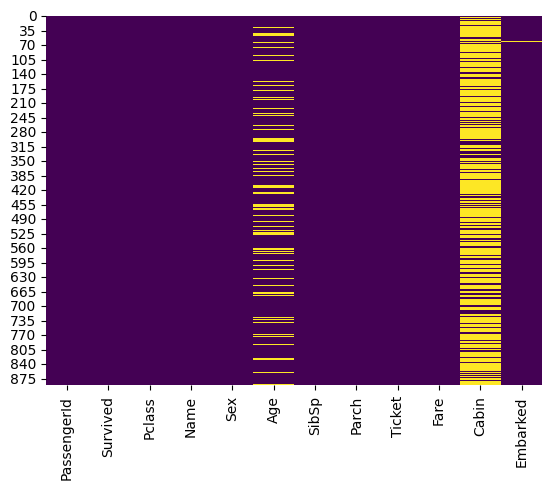

In [17]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [20]:
df['Age_missing'] = df['Age'].isnull().astype(int)
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked_missing'] = df['Embarked'].isnull().astype(int)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Cabin_known'] = df['Cabin'].notnull().astype(int)
df.drop(columns=['Cabin'], inplace=True)


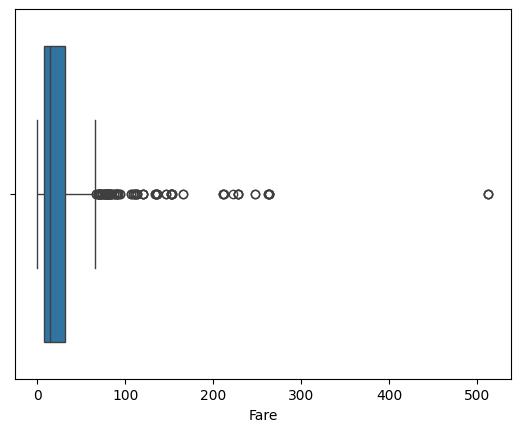

In [12]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(x=df['Fare'])
plt.show()



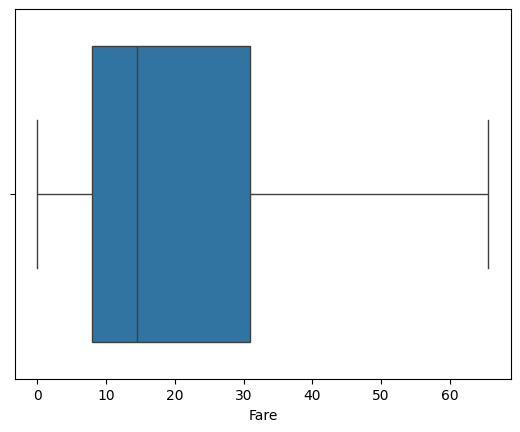

In [13]:
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])
sns.boxplot(x=df['Fare'])
plt.show()


In [14]:
df.to_csv("clean_v1.csv", index=False)


In [2]:
decision_log = """
# Decision Log – Titanic Cleaning

1. Missing Age: Imputed with median (skewed distribution).
2. Missing Embarked: Imputed with mode ('S').
3. Cabin: Too sparse (>77% missing) → Dropped, created Cabin_known flag.
4. Fare Outliers: Capped at 512.3292 (IQR method).
5. Added missingness flags for Age, Embarked.
"""

with open("decision_log.md", "w") as f:
    f.write(decision_log)


In [1]:
data_card = """
# Data Card – Titanic Dataset (clean_v1.csv)

**Source:** Kaggle Titanic dataset.
**Rows:** 891
**Columns:** 11 after cleaning.
**Preprocessing:** See decision_log.md.
**Intended Use:** EDA, modeling passenger survival.
**Limitations:** Cabin dropped due to missingness.
"""

with open("data_card.md", "w") as f:
    f.write(data_card)